In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from loaders import clean_text_for_pattern_letter
from temp_text_puh import template_str
# input_str = clean_text_for_pattern_letter(template_str, out_len=len(template_str))
input_str = clean_text_for_pattern_letter(template_str, out_len=5000)
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
5000
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [27]:
def predict_train(input_str: str | list, prev_n: int = 20):
    StatsDict: dict[str, dict] = {}

    for inp_idx, inp_ltr in enumerate(input_str):
        # if inp_idx == 0:
        #     continue
        
        for rev_idx in range(prev_n):
            prev_idx = inp_idx - rev_idx - 1

            if prev_idx < 0:
                break

            prev_ltr = input_str[prev_idx]
            
            prev_stats = StatsDict.setdefault(prev_ltr, {})
            stats = prev_stats.setdefault(rev_idx, {})
            stats.setdefault(inp_ltr, 0)
            
            stats[inp_ltr] += 1
    
    return StatsDict

In [28]:
# predict train

prev_n_L1 = 20

StatsDict_L1 = predict_train(input_str=input_str, prev_n=prev_n_L1)

In [29]:
for sdk, sdv in StatsDict_L1.items():
    print(sdk)
    for sd_k, sd_v in sdv.items():
        print(sd_k, sd_v)
    print('')

c
0 {'h': 22, 'e': 10, 'o': 12, 'k': 5, 'a': 8, 'l': 7, 'r': 3, 'i': 1}
1 {'a': 4, ' ': 17, 'd': 4, 'm': 9, 'r': 11, 'u': 8, 'n': 2, 'l': 4, 'i': 7, 'e': 1, 'f': 1}
2 {'p': 2, 'w': 3, ' ': 4, 'i': 15, 'o': 3, 'l': 5, "'": 1, 'y': 3, 's': 6, 'e': 7, 'u': 2, 't': 2, 'm': 7, 'c': 2, 'b': 1, 'r': 1, 'h': 1, 'g': 1, 'a': 2}
3 {'t': 5, 'e': 6, 'n': 4, 'f': 1, 's': 16, 'd': 5, ' ': 8, 'p': 2, 'h': 5, 'a': 2, 'b': 7, 'l': 3, 'r': 1, 'k': 1, 'o': 2}
4 {'e': 10, ' ': 21, 'o': 3, 'g': 3, 't': 16, 'h': 1, 'a': 5, 's': 1, 'l': 2, 'w': 1, 'u': 2, 'i': 2, 'r': 1}
5 {'r': 2, 'a': 2, ' ': 10, 'h': 7, 'o': 15, 's': 1, 'c': 2, 'i': 5, 'n': 4, 'd': 9, 'y': 4, 't': 4, 'u': 1, 'e': 1, 'f': 1}
6 {' ': 17, 'r': 3, 'w': 2, 'd': 3, 'i': 4, 'p': 13, 't': 3, 'y': 1, 'a': 3, 'm': 1, 'o': 4, 'e': 3, 'h': 3, 'l': 2, 'n': 2, 'k': 1, 's': 2, 'f': 1}
7 {'i': 7, 'e': 4, 'o': 9, 's': 3, 'h': 12, 'l': 4, ' ': 10, 'w': 1, 'u': 3, "'": 1, 'a': 7, 't': 2, 'y': 2, 'r': 1, 'n': 2}
8 {'n': 11, ' ': 12, 'w': 3, 'e': 13, 'p': 3, 

In [30]:
import copy

def predict(input_str: str | list, StatsDict: dict, letters:list, prev_n: int):
    TF = []
    err = 0

    output = []

    for inp_idx, inp in enumerate(input_str):
        if inp_idx == len(input_str) - 1:
            break

        stats = []

        for rev_idx in range(prev_n):
            let_idx = inp_idx - rev_idx
            if let_idx < 0:
                break
            # print(inp_idx, let_idx, rev_idx)
            st = copy.deepcopy(StatsDict[input_str[let_idx]].get(rev_idx, {}))
            stats.append(st)
        # print(inp)
        for st in stats:
            st_sum = sum(st.values())

            for key, val in st.items():
                st[key] = val / st_sum

            # print(input_str[inp_idx + 1], max(st, key=st.get), st)
            
        letter_stats = {}
        for letter in letters:
            # letter_stats.setdefault(letter, stats[0].get(letter, 0))
            letter_stats.setdefault(letter, 0)

            for st in stats:
                st_let = st.get(letter, 0)

                if st_let == 0:
                    letter_stats[letter] = 0
                    break
                # if not letter_stats[letter]:
                #     letter_stats[letter] = st_let
                # else:
                letter_stats[letter] += st_let

        max_key = max(letter_stats, key=letter_stats.get)
        # TF.append(sum(letter_stats.values()))
        # TF.append(letter_stats[max_key])

        ls_arr = np.array(list(letter_stats.values()))
        # tf = np.sum(ls_arr > 0)
        # ls_arr /= np.max(ls_arr)
        # tf = np.sum(np.abs(ls_arr - ls_arr[np.newaxis].T))

        # tf = np.mean(ls_arr)
        tf = letter_stats[max_key]
        
        TF.append(tf)
        
        if inp_idx + 1 < len(input_str):
            print(input_str[inp_idx + 1], max_key, letter_stats[max_key], tf)

            if input_str[inp_idx + 1] != max_key:
                err += 1
        else:
            print('>', max_key, letter_stats[max_key], tf)
        print()

        output.append(max_key)

    TF.append(0)

    return TF, err, output

In [31]:
# predict L1

TF, err, out_L1 = predict(input_str=input_str, StatsDict=StatsDict_L1, prev_n=prev_n_L1, letters=letters)

print(err, err / (len(input_str) / 100) )

h h 0.3235294117647059 0.3235294117647059

a e 0.5059339525283797 0.5059339525283797

p   0.503928226638703 0.503928226638703

t   0.8660267738895957 0.8660267738895957

e   1.1718476573568208 1.1718476573568208

r   1.023992033665004 1.023992033665004

    1.8660882740880678 1.8660882740880678

i a 0.6173037190410008 0.6173037190410008

n   1.384082708612219 1.384082708612219

    2.1637964210546867 2.1637964210546867

w i 0.8945664590143406 0.8945664590143406

h   2.112771603557213 2.112771603557213

i   2.4727714122988167 2.4727714122988167

c   2.896525428421598 2.896525428421598

h e 1.293022031777112 1.293022031777112

    3.145507680428675 3.145507680428675

w e 1.3536774676597008 1.3536774676597008

e   3.322978913609816 3.322978913609816

    3.8276432612224442 3.8276432612224442

a t 1.72673507109188 1.72673507109188

r   4.083022670404351 4.083022670404351

e   4.26170487324124 4.26170487324124

    4.659119202613035 4.659119202613035

i t 1.668195757337698 1.668195757337698

In [32]:
# # peak clusters
# KF = []

# peaks = {}
# second_layer_K: dict[int, dict] = {}

# sum_K = {}
# for k_idx in range(prev_n_L1):
#     sum_K.setdefault(k_idx, {})

#     for letter in letters:
#         sum_K[k_idx].setdefault(letter, 0)

# prev_K = {}
# for k_idx in range(prev_n_L1):
#     prev_K.setdefault(k_idx, {})

#     for letter in letters:
#         prev_K[k_idx].setdefault(letter, 0)

# for inp_idx, inp in enumerate(input_str):
#     sumK = 0

#     for k_idx in range(prev_n_L1):
#         for letter in letters:
#             let_stats = StatsDict_L1[inp][k_idx].get(letter, 0)

#             if let_stats == 0:
#                 sum_K[k_idx][letter] = -1
#                 continue
            
#             if sum_K[k_idx][letter] != -1:
#                 sum_K[k_idx][letter] += let_stats
        
#         sum_K_val = np.array(list(sum_K[k_idx].values()))
#         sum_K_val[np.where(sum_K_val == -1)] = 0
#         sumK += sum_K_val.sum()
    
#     if sumK <= 0:
#     # if len(KF) > 0 and sumK < KF[-1]: # err: 10 -> 63
#         for k_idx in range(prev_n_L1):
#             for letter in letters:
#                 sum_K[k_idx][letter] = 0
        
#         sumK = 0
    
#     # print(sumK)
#     if len(KF) > 0 and sumK < KF[-1]:
#         prv_idx = inp_idx - 1
#         peaks.setdefault(prv_idx, str(prv_idx))
#         second_layer_K.setdefault(str(prv_idx), prev_K)
    
#     KF.append(sumK)

#     prev_K = copy.deepcopy(sum_K)

# # print(peaks, len(peaks))

# # print(KF)

In [39]:
def get_word_stats(input_str: str | list, TF: list, ):
    buffer: list = []
    WordStats: dict[str, int] = {}

    prev_tf = TF[0]

    for inp_idx, inp in enumerate(input_str):
        if inp_idx <= 0:
            continue

        if TF[inp_idx] - prev_tf < 0:
            word = ''.join(buffer)

            WordStats.setdefault(word, 0)
            WordStats[word] += 1

            buffer = []
            prev_tf = TF[inp_idx]
            
            continue

        buffer.append(inp)
        prev_tf = TF[inp_idx]
    
    # sort
    WordStats = dict(sorted(WordStats.items(), key=lambda item: item[1], reverse=True))

    return WordStats

WordStats_L1 = get_word_stats(input_str=input_str, TF=TF)
for key, val in WordStats_L1.items():
    print(key, val)

 331
t 145
e 107
s 104
d 70
a 54
he 48
p 42
y 41
and 38
i 38
n 36
f 34
g 33
r 32
w 31
u 26
b 25
of 25
ng 24
er 22
h 21
is 20
at 19
me 17
the 17
it 16
as 14
re 13
id 13
in 12
ed 12
oh 12
be 11
rob 11
to 11
es 10
on 10
l 10
o 10
se 10
no 9
li 9
had 9
ing 9
if 8
k 7
ust 7
ch 7
rt 7
bu 6
his 6
only 6
m 6
you 6
nd 6
ll 6
co 5
rs 5
ca 5
winn 5
so 5
la 5
we 4
bee 4
beg 4
ow 4
't 4
what 4
ns 4
all 4
nt 4
very 4
lo 4
by 4
chr 4
ee 4
buz 4
zz 4
ey 4
bran 4
nn 3
but 3
ano 3
na 3
him 3
n't 3
out 3
st 3
th 3
one 3
hi 3
od 3
ma 3
ou 3
ho 3
cl 3
hon 3
ne 3
et 3
int 2
rd 2
com 2
mo 2
when 2
goin 2
poo 2
like 2
ry 2
ld 2
sw 2
su 2
cou 2
ag 2
und 2
wh 2
or 2
le 2
voi 2
en 2
an 2
midd 2
fr 2
up 2
mb 2
lit 2
anot 2
bea 2
ha 2
ir 2
get 2
rat 2
was 2
said 2
c 2
mes 2
sh 2
pink 2
wond 2
about 2
ball 2
pt 1
whi 1
are 1
irs 1
ind 1
chris 1
som 1
way 1
could 1
ink 1
per 1
any 1
tt 1
oug 1
he's 1
win 1
know 1
ah 1
ck 1
ion 1
come 1
ory 1
ening 1
ab 1
ve 1
i' 1
try 1
sa 1
ied 1
ti 1
abou 1
ms 1
'u 1
ers 1
wi 1
sn

(5000,)


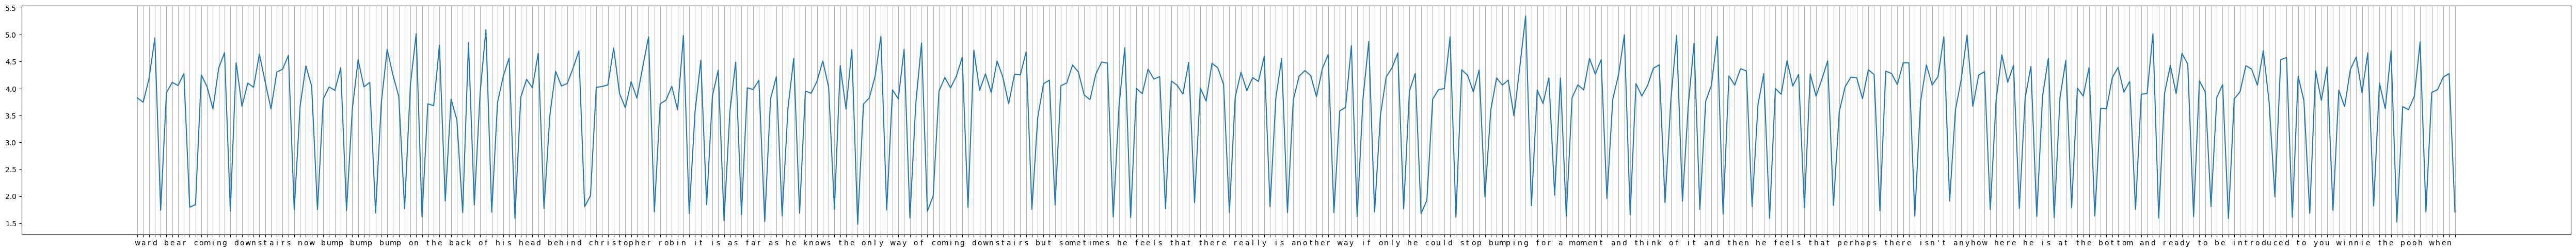

In [35]:
begin = 100
length = 500

TF_arr = np.array(TF, dtype=float)

# TF_prev = TF_arr - np.pad(TF_arr, (1, 0))[:-1]
# TF_post = TF_arr - np.pad(TF_arr, (0, 1))[1:]
# TF_arr = TF_prev + TF_post
print(TF_arr.shape)
# TF_arr[np.where(TF_arr < 0)] = 0

# TF_arr = np.abs(TF_arr)
# TF[np.where(TF <= np.mean(TF[np.where(TF > 0)]))] = 0
# # TF[np.where(TF <= 0.5)] = 0
# print(TF.size, TF.max(), TF.min())

# KF = KF[:length]
# KF = np.array(KF)
# KF = KF - np.pad(KF, (0, 1))[1:]
# # print(TF)
# KF[np.where(KF < 0)] = 0
# KF = np.abs(KF)
# KF[np.where(KF <= np.mean(KF[]))] = 0

# # TF /= np.max(TF)
# KF /= np.max(KF)

TF_arr = TF_arr[begin:length]

fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
# axs.plot(np.arange(TF.size), TF)
axs.plot(np.arange(TF_arr.size), TF_arr)
axs.xaxis.set_ticks(np.arange(len(input_str[begin:length])), input_str[begin:length])
axs.xaxis.grid(True)

plt.show()

In [36]:
print(len(input_str), len(KF))
print(peaks)
print(len(peaks), np.sum(KF > 0))
np.where(KF > 0)

NameError: name 'KF' is not defined

In [ ]:
# prob slK
upstream_patterns = []

for idx, item in second_layer_K.items():
    symbol_stats = []

    for letter in letters:
        letter_sum = 0

        for idx_2, item_2 in item.items():
            symbol_st = second_layer_K[idx][idx_2][letter]
            if symbol_st == -1:
                continue

            letter_sum += symbol_st
        
        symbol_stats_prod = 0
        for idx_2, item_2 in item.items():
            symbol_st = second_layer_K[idx][idx_2][letter]
            if symbol_st > 0:
                second_layer_K[idx][idx_2][letter] /= letter_sum

                if symbol_stats_prod == 0:
                    symbol_stats_prod = second_layer_K[idx][idx_2][letter]
                    continue

                symbol_stats_prod *= second_layer_K[idx][idx_2][letter]
        
        symbol_stats.append(symbol_stats_prod)
    
    print(symbol_stats)
    upstream_patterns.append(symbol_stats)
        
upstream_patterns = np.array(upstream_patterns)
print(upstream_patterns.shape)

[4.820615307161007e-25, 0.00030117300819189514, 0.24998347544451052, 2.163346736109948e-18, 4.884112222409493e-25, 0.036599988719653385, 1.1539002131153317e-06, 1.0810830908185913e-21, 2.5025393847194927e-23, 0, 1.0, 3.3507361883379923e-12, 2.11883287695867e-05, 5.293366568286923e-20, 5.2983902409540405e-20, 0.0003179301900639501, 0, 5.060699396788284e-20, 1.1630570848056718e-21, 2.3995141789107012e-23, 3.2542184059649344e-12, 0, 2.1983260158658384e-09, 0, 0.003825197137857889, 0, 4.973973248788984e-25, 0, 0, 0, 0, 0]
[4.876691225967934e-25, 0.0038700725842045307, 1.0, 8.418422855935721e-17, 4.950731864244375e-25, 0.2479587022789955, 0.00031405576188056524, 4.912630265377119e-20, 2.4915083904235358e-23, 0, 0, 2.5094803323660247e-09, 0.003893215036786894, 2.2193836296163805e-18, 5.3379777920954484e-20, 0.2495848114700131, 0, 5.2023039494912614e-20, 5.255812672907512e-20, 2.435139849370239e-23, 3.3208674036993604e-12, 0, 2.0875211008555266e-05, 0, 0.03668152167442697, 0, 4.99256227793578

In [ ]:
# upstream clustering

layer_size = 32

I = np.zeros(len(letters))
O = np.zeros(layer_size)
W = np.random.rand(O.size, I.size) * 0.001
print('W', W.shape, W.max(), W.min(), np.median(W))

k = 1
push_delta = 0.4

prec = 1e-30

epoch_cnt = 100
eps0 = 0.002

samples_idx = np.arange(upstream_patterns.shape[0])

for epoch_idx in range(epoch_cnt):
    eps = (epoch_cnt - epoch_idx) * eps0

    np.random.shuffle(samples_idx)

    for i_idx in samples_idx:
        I = upstream_patterns[i_idx]

        # infer
        DO = np.abs(I - W)**2
        O = np.sum(DO, axis=1)

        # train
        winner_ids = np.argsort(O)

        D = np.zeros(O.shape)
        D[winner_ids[0]] = 1
        # D[winner_ids[1:1+k]] = -push_delta
        D = D[np.newaxis].T

        dW = -(W - I)

        # norm
        # nc = np.linalg.norm(dW, axis=1, ord=1)
        # nc[np.where(nc < prec)] = prec
        # nc = nc[np.newaxis].T
        # dW /= nc

        # update
        # O /= np.max(np.abs(O))
        # O = O[np.newaxis].T

        W += dW * D * eps       

print('W', W.shape, W.max(), W.min(), np.median(W))
for w in W:
    print(w.tolist())

W (32, 32) 0.0009978672399238795 8.955400881716092e-07 0.0005120403659679836
W (32, 32) 0.9999999999999706 1.4824352986407634e-20 0.0004132878953062948
[0.00047295182062252885, 8.05154646286379e-05, 0.0005234346952209374, 0.0005884140127254983, 0.0006198391213987406, 0.0006259091986278777, 0.0004957296011516442, 0.00015641689902307478, 0.00043119301988107597, 0.0006975484638751648, 0.0008338264534578046, 0.00040704772128034595, 0.0007576401418596878, 0.0004004656668631089, 0.00022721249482444283, 0.00027669068510040464, 0.0007952786709239524, 2.2914121034313673e-05, 0.0008101537602344674, 0.00028917184610734213, 0.0003048682987224736, 0.0009698302896886754, 0.00032600397779284875, 0.0008803535815262916, 0.00044740697809947274, 0.00022627094941782866, 0.0002513876007580762, 0.0008755694575771354, 0.0007812371311218571, 0.0008791516609447228, 0.00015209438272179832, 0.0006649838067531128]
[0.00015714950442101473, 0.00015976142816868068, 0.0009498293882042541, 0.00050761892528352, 0.00029

In [ ]:
sl_input = []
for peak in peaks.values():
    sl_input.append(str(peak))

print(len(sl_input))

13


In [ ]:
# second layer predict train

prev_n_L2 = 10

StatsDict_L2 = predict_train(input_str=sl_input, prev_n=prev_n_L2)

for key, val in StatsDict_L2.items():
    print(key, val)

10 {0: {'29': 1}, 1: {'59': 1}, 2: {'62': 1}, 3: {'85': 1}, 4: {'156': 1}, 5: {'159': 1}, 6: {'226': 1}, 7: {'227': 1}, 8: {'409': 1}, 9: {'529': 1}}
29 {0: {'59': 1}, 1: {'62': 1}, 2: {'85': 1}, 3: {'156': 1}, 4: {'159': 1}, 5: {'226': 1}, 6: {'227': 1}, 7: {'409': 1}, 8: {'529': 1}, 9: {'747': 1}}
59 {0: {'62': 1}, 1: {'85': 1}, 2: {'156': 1}, 3: {'159': 1}, 4: {'226': 1}, 5: {'227': 1}, 6: {'409': 1}, 7: {'529': 1}, 8: {'747': 1}, 9: {'800': 1}}
62 {0: {'85': 1}, 1: {'156': 1}, 2: {'159': 1}, 3: {'226': 1}, 4: {'227': 1}, 5: {'409': 1}, 6: {'529': 1}, 7: {'747': 1}, 8: {'800': 1}}
85 {0: {'156': 1}, 1: {'159': 1}, 2: {'226': 1}, 3: {'227': 1}, 4: {'409': 1}, 5: {'529': 1}, 6: {'747': 1}, 7: {'800': 1}}
156 {0: {'159': 1}, 1: {'226': 1}, 2: {'227': 1}, 3: {'409': 1}, 4: {'529': 1}, 5: {'747': 1}, 6: {'800': 1}}
159 {0: {'226': 1}, 1: {'227': 1}, 2: {'409': 1}, 3: {'529': 1}, 4: {'747': 1}, 5: {'800': 1}}
226 {0: {'227': 1}, 1: {'409': 1}, 2: {'529': 1}, 3: {'747': 1}, 4: {'800': 1}}


In [ ]:
letters_L2 = copy.deepcopy(sl_input)

TF_L2, err_L2, out_L2 = predict(input_str=sl_input, StatsDict=StatsDict_L2, prev_n=prev_n_L2, letters=letters_L2)

print(err_L2, err_L2 / (len(sl_input) / 100) )


29 29 1.0 1

59 59 2.0 1

62 62 3.0 1

85 85 4.0 1

156 156 5.0 1

159 159 6.0 1

226 226 7.0 1

227 227 8.0 1

409 409 9.0 1

529 529 10.0 1

747 747 10.0 1

800 800 10.0 1

0 0.0


In [ ]:
# probability clusters
for key, val in second_layer_K.items():
    pass

In [ ]:
def downstream_predict(input_str: str | list, 
                       StatsDict_L1: dict, 
                       letters: list,
                       out_L2: list,
                       peaks: dict,
                       second_layer_K: dict[int, dict],
                       downstream_patterns,
                       prev_n: int, ):
    TF = []
    err = 0

    out_idx = 1

    ds_K = second_layer_K[out_L2[0]]

    for inp_idx, inp in enumerate(input_str):
        if inp_idx == len(input_str) - 1:
            break

        is_peak = peaks.get(inp_idx - 1, -1)
        if is_peak != -1 and out_idx < len(out_L2):
            ds_K = second_layer_K[out_L2[out_idx]]
            out_idx += 1

        stats = []
        # print(f'{ds_K=}')
        # ds_stats = []
        for rev_idx in range(prev_n):
            let_idx = inp_idx - rev_idx
            
            if let_idx < 0:
                break
            # print(inp_idx, let_idx, rev_idx)
            st = copy.deepcopy(StatsDict_L1[input_str[let_idx]].get(rev_idx, {}))
            stats.append(st)

            # ds_st = ds_K[rev_idx]
            # ds_stats.append(ds_st)
        # for st_idx, st in enumerate(stats):
        #     ds_st = ds_K[st_idx]

        #     for key, val in st.items():
        #         if ds_st[key] != -1:
        #             st[key] += ds_st[key]
                # else:
                #     st[key] = 1e-30

        # print(inp)
        for st_idx, st in enumerate(stats):
            st_sum = sum(st.values())

            ds_st = ds_K[st_idx]
            ds_arr = np.array(list(ds_st.values()))
            ds_arr[np.where(ds_arr < 0)] = 0
            ds_sum = np.sum(ds_arr)

            for key, val in st.items():
                st[key] = val / st_sum
                if ds_sum > 0:
                    ds_st[key] = ds_st[key] / ds_sum
                if ds_st[key] < 0:
                    ds_st[key] = -1
                # else:
                #     st[key] = 0
            # print(input_str[inp_idx + 1], max(st, key=st.get), st)
            # print(ds_K[st_idx])
            
        letter_stats = {}
        for letter in letters:
            letter_stats.setdefault(letter, 0)

            for st in stats:
                st_let = st.get(letter, 0)

                if st_let == 0:
                    letter_stats[letter] = 0
                    break

                letter_stats[letter] += st_let
            
            ds_smbl_prob = 1
            for rank_idx in range(prev_n):
                ds_smbl_prob_rank = ds_K[rank_idx].get(letter, -1)
                if ds_smbl_prob_rank == -1:
                    continue
            
                ds_smbl_prob *= ds_smbl_prob_rank # *=
            
            letter_stats[letter] *= ds_smbl_prob
            

        # print(f'{letter_stats=}')

        max_key = max(letter_stats, key=letter_stats.get)
        # TF.append(sum(letter_stats.values()))
        # TF.append(letter_stats[max_key])

        ls_arr = np.array(list(letter_stats.values()))
        tf = np.sum(ls_arr > 0)
        
        TF.append(tf)
        
        if inp_idx + 1 < len(input_str):
            print(input_str[inp_idx + 1], max_key, letter_stats[max_key], tf)

            if input_str[inp_idx + 1] != max_key:
                err += 1
        else:
            print('>', max_key, letter_stats[max_key], tf)
        print()

    return TF, err

In [ ]:
ds_TF, ds_err = downstream_predict(input_str=input_str,
                                   StatsDict_L1=StatsDict_L1,
                                   letters=letters,
                                   out_L2=out_L2,
                                   peaks=peaks,
                                   second_layer_K=second_layer_K,
                                   prev_n=prev_n_L1, )


print(ds_err, ds_err / (len(input_str) / 100) )

TypeError: downstream_predict() missing 1 required positional argument: 'downstream_patterns'